In [3]:
import numpy as np
import keras

docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [7]:
tokenizer.fit_on_texts(docs)

In [9]:
tokenizer.word_index

{'india': 1,
 'jeetega': 2,
 'hip': 3,
 'ki': 4,
 'jai': 5,
 'kohli': 6,
 'sachin': 7,
 'dhoni': 8,
 'go': 9,
 'hurray': 10,
 'bhai': 11,
 'bharat': 12,
 'mata': 13,
 'modi': 14,
 'ji': 15,
 'inquilab': 16,
 'zindabad': 17}

In [12]:
sequences = tokenizer.texts_to_sequences(docs)


In [13]:
sequences

[[9, 1],
 [1, 1],
 [3, 3, 10],
 [2, 11, 2, 1, 2],
 [12, 13, 4, 5],
 [6, 6],
 [7, 7],
 [8, 8],
 [14, 15, 4, 5],
 [16, 17]]

In [14]:
from keras.utils import pad_sequences

In [18]:
sequences = pad_sequences(sequences , padding ='post')

In [20]:
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [21]:
model = Sequential()

In [22]:
model = Sequential()
model.add(Embedding(17,output_dim=2,input_length=5))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile('adam','accuracy')


In [26]:
model = Sequential()
# The vocabulary size is 16 (index 0 to 16), so input_dim should be 17.
model.add(Embedding(17, output_dim=2, input_length=5))

model.summary()

model.compile('adam','accuracy')

# Before prediction, ensure all indices in 'sequences' are within the valid range.
# If there is an index greater than 16 (the vocabulary size)
# we set it to the unknown token index 0.
for i in range(len(sequences)):
    for j in range(len(sequences[i])):
        if sequences[i][j] > 16:
            sequences[i][j] = 0

# this will replace all out-of-vocabulary word indices with the unknown token index (which is typically 0)

pred = model.predict(sequences)
print(pred)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
[[[ 0.04083495 -0.00117363]
  [-0.02278018 -0.00611898]
  [ 0.0266834   0.00565609]
  [ 0.0266834   0.00565609]
  [ 0.0266834   0.00565609]]

 [[-0.02278018 -0.00611898]
  [-0.02278018 -0.00611898]
  [ 0.0266834   0.00565609]
  [ 0.0266834   0.00565609]
  [ 0.0266834   0.00565609]]

 [[-0.01833185 -0.03167756]
  [-0.01833185 -0.03167756]
  [-0.03822644 -0.02976267]
  [ 0.0266834   0.00565609]
  [ 0.0266834   0.00565609]]

 [[ 0.02539176 -0.01700982]
  [ 0.01642734 -0.02997612]
  [ 0.02539176 -0.01700982]
  [-0.02278018 -0.00611898]
  [ 0.02539176 -0.01700982]]

 [[-0.00243527  0.04793713]
  [-0.01995063 -0.02917041]
  [-0.00530993 -0.03167512]
  [-0.03152347  0.04552921]
  [ 0.0266834   0.00565609]]

 [[-0.02907945  0.03223756]
  [-0.02907945  0.03223756]
  [ 0.0266834   0.00565609]
  [ 0.0266834   0.00565609]
  [ 0.0266834   0.00565609]]

 [[ 0.01999824  0.00023457]
  [ 0.01999824  0.00023457]
  [ 0.0266834   0.00565609]
  [ 0.0266834   0.0056560

In [40]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,Embedding,Flatten

# Load the IMDB dataset with a limited vocabulary size
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Pad the sequences
X_train = pad_sequences(X_train, padding='post', maxlen=100)
X_test = pad_sequences(X_test, padding='post', maxlen=100)

# Define the model
model = Sequential()
# The input_length argument is specified during the first layer creation
model.add(Embedding(10000, 2, input_length=100))
model.add(SimpleRNN(32, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - acc: 0.5117 - loss: 0.6925 - val_acc: 0.6088 - val_loss: 0.6641
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - acc: 0.6465 - loss: 0.6244 - val_acc: 0.7491 - val_loss: 0.5206
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - acc: 0.7875 - loss: 0.4761 - val_acc: 0.7983 - val_loss: 0.4646
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - acc: 0.8406 - loss: 0.3771 - val_acc: 0.8246 - val_loss: 0.4081
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - acc: 0.8783 - loss: 0.3082 - val_acc: 0.8257 - val_loss: 0.4169


In [41]:
import matplotlib.pyplot as plt

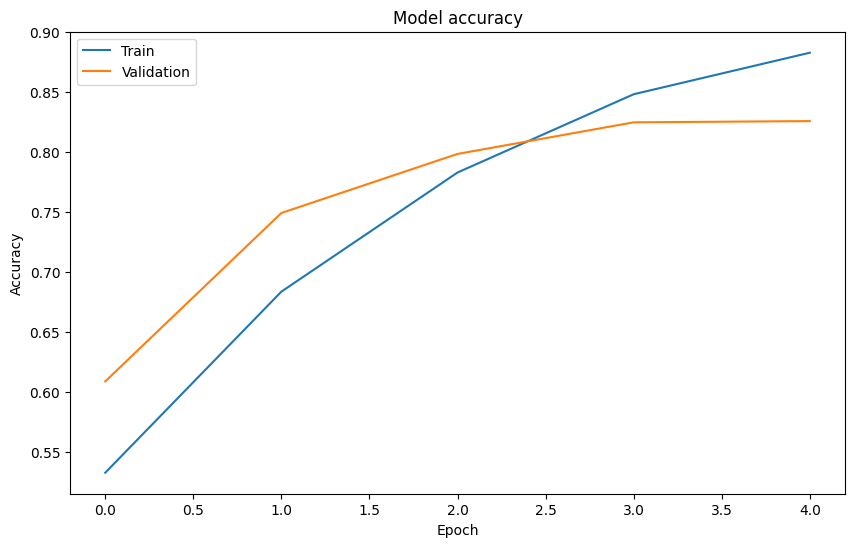

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()